# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

now = datetime.datetime.now()

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name + ',' + citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print (cities)


634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Latitude","Longitude","Temperature (F)","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 0

print ("Retrieving weather data:")
for city in cities: 
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + city.replace(" ","+")
    #print (target_url)
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("Location not found, skipping...")
    else:
        cities_df.loc[row_count, "City"]= city_data["name"]
        cities_df.loc[row_count, "Country"]= city_data["sys"]["country"]
        cities_df.loc[row_count, "Latitude"]= city_data["coord"]["lat"]
        cities_df.loc[row_count, "Longitude"]= city_data["coord"]["lon"]
        cities_df.loc[row_count, "Temperature (F)"]= city_data["main"]["temp"]
        cities_df.loc[row_count, "Humidity (%)"]=  city_data["main"]["humidity"]
        cities_df.loc[row_count, "Cloudiness (%)"]= city_data["clouds"]["all"]
        cities_df.loc[row_count, "Wind Speed (mph)"]= city_data["wind"]["speed"]
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Retrieving weather data:
------------------------
Proceesing: City #  0  |  Tuktoyaktuk CA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=tuktoyaktuk,ca
------------------------
Proceesing: City #  1  |  Sungaipenuh ID
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=sungaipenuh,id
Location not found, skipping...
Location not found, skipping...
Location not found, skipping...
------------------------
Proceesing: City #  2  |  Ponta do Sol CV
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=ponta+do+sol,cv
------------------------
Proceesing: City #  3  |  Egvekinot RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=egvekinot,ru
------------------------
Proceesing: City #  4  |  Atuona PF
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae1

------------------------
Proceesing: City #  44  |  Erzin RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=erzin,ru
------------------------
Proceesing: City #  45  |  Ahipara NZ
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=ahipara,nz
------------------------
Proceesing: City #  46  |  Naberera TZ
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=naberera,tz
------------------------
Proceesing: City #  47  |  Vila Franca do Campo PT
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=vila+franca+do+campo,pt
------------------------
Proceesing: City #  48  |  Provideniya RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=provideniya,ru
------------------------
Proceesing: City #  49  |  Sitka US
http://api.openweather

------------------------
Proceesing: City #  89  |  Saskylakh RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=saskylakh,ru
------------------------
Proceesing: City #  90  |  Ca Mau VN
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=ca+mau,vn
------------------------
Proceesing: City #  91  |  Kapaa US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=kapaa,us
Location not found, skipping...
------------------------
Proceesing: City #  92  |  Punta Arenas CL
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=punta+arenas,cl
------------------------
Proceesing: City #  93  |  Kavieng PG
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=kavieng,pg
------------------------
Proceesing: City #  94  |  Kavaratti IN
http://api

------------------------
Proceesing: City #  134  |  Concepcion PY
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=concepcion,py
Location not found, skipping...
------------------------
Proceesing: City #  135  |  Ginir ET
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=ginir,et
------------------------
Proceesing: City #  136  |  Miles City US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=miles+city,us
------------------------
Proceesing: City #  137  |  Maniitsoq GL
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=maniitsoq,gl
------------------------
Proceesing: City #  138  |  Serdobsk RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=serdobsk,ru
Location not found, skipping...
------------------------
Procees

------------------------
Proceesing: City #  179  |  Butaritari KI
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=butaritari,ki
------------------------
Proceesing: City #  180  |  Sabha LY
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=sabha,ly
Location not found, skipping...
------------------------
Proceesing: City #  181  |  Deputatskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=deputatskiy,ru
------------------------
Proceesing: City #  182  |  Phan Thiet VN
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=phan+thiet,vn
------------------------
Proceesing: City #  183  |  Monrovia LR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=monrovia,lr
------------------------
Proceesing: City #  184  |  Kurilsk

------------------------
Proceesing: City #  224  |  Sinnamary GF
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=sinnamary,gf
------------------------
Proceesing: City #  225  |  Lingao CN
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=lingao,cn
------------------------
Proceesing: City #  226  |  Sao Joao da Barra BR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=sao+joao+da+barra,br
------------------------
Proceesing: City #  227  |  Bethel US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=bethel,us
------------------------
Proceesing: City #  228  |  Boone US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=boone,us
------------------------
Proceesing: City #  229  |  Las Cruces US
http://api.openweathermap.o

------------------------
Proceesing: City #  270  |  Muisne EC
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=muisne,ec
------------------------
Proceesing: City #  271  |  Muros ES
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=muros,es
------------------------
Proceesing: City #  272  |  Clyde River CA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=clyde+river,ca
------------------------
Proceesing: City #  273  |  Krasnovishersk RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=krasnovishersk,ru
------------------------
Proceesing: City #  274  |  Khatanga RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=khatanga,ru
------------------------
Proceesing: City #  275  |  Jiaohe CN
http://api.openweathermap.org

------------------------
Proceesing: City #  315  |  Alugan PH
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=alugan,ph
------------------------
Proceesing: City #  316  |  Lompoc US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=lompoc,us
------------------------
Proceesing: City #  317  |  Oriximina BR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=oriximina,br
------------------------
Proceesing: City #  318  |  Makinsk KZ
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=makinsk,kz
------------------------
Proceesing: City #  319  |  Andros Town BS
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=andros+town,bs
------------------------
Proceesing: City #  320  |  Spearfish US
http://api.openweathermap.org/data/2

------------------------
Proceesing: City #  360  |  Kedrovyy RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=kedrovyy,ru
------------------------
Proceesing: City #  361  |  Vizinga RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=vizinga,ru
Location not found, skipping...
------------------------
Proceesing: City #  362  |  Grindavik IS
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=grindavik,is
------------------------
Proceesing: City #  363  |  Pasighat IN
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=pasighat,in
------------------------
Proceesing: City #  364  |  Sept-Iles CA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=sept-iles,ca
------------------------
Proceesing: City #  365  |  Nemuro JP
htt

------------------------
Proceesing: City #  405  |  Aksarka RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=aksarka,ru
------------------------
Proceesing: City #  406  |  Goya AR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=goya,ar
------------------------
Proceesing: City #  407  |  Yulara AU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=yulara,au
------------------------
Proceesing: City #  408  |  San Rafael BO
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=san+rafael,bo
------------------------
Proceesing: City #  409  |  San Joaquin BO
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=san+joaquin,bo
------------------------
Proceesing: City #  410  |  Vao NC
http://api.openweathermap.org/data/2.5/weath

------------------------
Proceesing: City #  450  |  Anadyr RU
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=anadyr,ru
------------------------
Proceesing: City #  451  |  Katsuura JP
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=katsuura,jp
------------------------
Proceesing: City #  452  |  San Antonio CL
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=san+antonio,cl
------------------------
Proceesing: City #  453  |  Westport IE
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=westport,ie
------------------------
Proceesing: City #  454  |  Lakselv NO
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=lakselv,no
------------------------
Proceesing: City #  455  |  Leopold AU
http://api.openweathermap.org/data/2

------------------------
Proceesing: City #  495  |  Jardim BR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=jardim,br
------------------------
Proceesing: City #  496  |  Ambon ID
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=ambon,id
------------------------
Proceesing: City #  497  |  Ilulissat GL
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=ilulissat,gl
------------------------
Proceesing: City #  498  |  Moose Factory CA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=moose+factory,ca
------------------------
Proceesing: City #  499  |  Kidal ML
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=kidal,ml
------------------------
Proceesing: City #  500  |  Baykit RU
http://api.openweathermap.org/data/2.5/we

------------------------
Proceesing: City #  541  |  Opuwo NA
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=opuwo,na
Location not found, skipping...
------------------------
Proceesing: City #  542  |  Pemba MZ
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=pemba,mz
------------------------
Proceesing: City #  543  |  Williston US
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=williston,us
------------------------
Proceesing: City #  544  |  Zwedru LR
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=zwedru,lr
------------------------
Proceesing: City #  545  |  Uyuni BO
http://api.openweathermap.org/data/2.5/weather?appid=6a1441b70252db34d92228b913e8ae18&units=IMPERIAL&q=uyuni,bo
------------------------
Proceesing: City #  546  |  Napier NZ
http://api.openweathermap

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
cities_df.to_csv("cities_data.csv")

cities_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Tuktoyaktuk,CA,69.44,-133.03,-0.41,64,20,17.22
1,Sungaipenuh,ID,-2.08,101.38,73.33,86,92,0.94
2,Ponta do Sol,CV,17.2,-25.09,68,77,20,14.99
3,Egvekinot,RU,66.32,-179.17,20.82,88,36,6.76
4,Atuona,PF,-9.8,-139.03,81.52,100,0,8.88


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

(-40, 120)

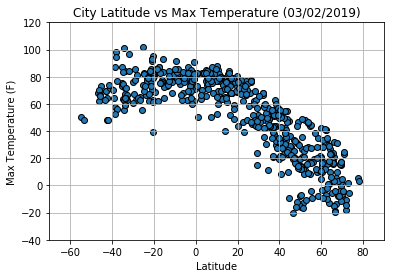

In [75]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Temperature (F)"], marker="o",
            edgecolor="black", linewidths=1, alpha=1.0)

plt.title(f"City Latitude vs Max Temperature ({now.strftime('%m/%d/%Y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 90])
plt.ylim([-40, 120])


#### Latitude vs. Humidity Plot

(-10, 110)

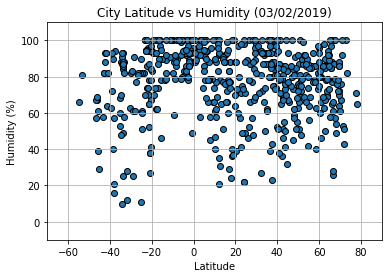

In [73]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Humidity (%)"], marker="o",
            edgecolor="black", linewidths=1, alpha=1.0)

plt.title(f"City Latitude vs Humidity ({now.strftime('%m/%d/%Y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 90])
plt.ylim([-10, 110])

#### Latitude vs. Cloudiness Plot

(-10, 110)

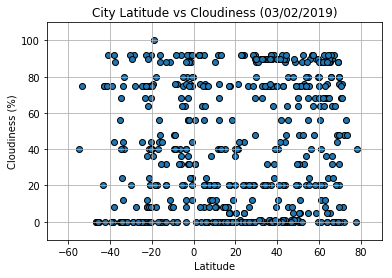

In [71]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Cloudiness (%)"], marker="o",
            edgecolor="black", linewidths=1, alpha=1.0)

plt.title(f"City Latitude vs Cloudiness ({now.strftime('%m/%d/%Y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 90])
plt.ylim([-10, 110])

#### Latitude vs. Wind Speed Plot

(-10, 50)

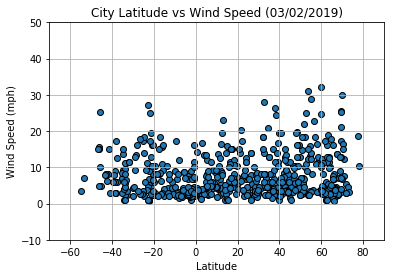

In [72]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Wind Speed (mph)"], marker="o",
            edgecolor="black", linewidths=1, alpha=1.0)

plt.title(f"City Latitude vs Wind Speed ({now.strftime('%m/%d/%Y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 90])
plt.ylim([-10, 50])